# Dataset Preparation


Here we will perform the creation of the **learning set** from the raw data of ***ADNIMERGE***. 

## Load the Dataset

In [1]:
import numpy as np
import pandas as pd 

from CogniPredictAD.preprocessing import ADNICleaner, ADNITransformator, OutlierDetector
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows", 116)
pd.set_option("display.max_columns", 116)
pd.set_option("display.max_info_columns", 116) 

learning_set = pd.read_csv("../data/ADNIMERGE.csv")
display(learning_set)

C:\Users\Utente\AppData\Local\Temp\ipykernel_5940\1057879190.py:11: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  learning_set = pd.read_csv("../data/ADNIMERGE.csv")


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,mPACCdigit,mPACCtrailsB,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.33615,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,-4.31028,-4.11443,2005-09-08,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,-4.31028,-4.114430,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10860,NaN,NaN,NaN,741.5,239.7,22.83,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,-16.24490,-15.82990,2005-09-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.24490,-15.829900,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.07796,NaN,NaN,NaN,NaN,NaN,NaN,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0000,NaN,19.0,135.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,31863.0,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,-14.76900,-13.13950,2005-09-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.24490,-15.829900,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.11626,NaN,NaN,NaN,601.4,251.7,24.18,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0000,0.0,21.0,126.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35576.0,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,-20.96910,-19.77900,2005-09-12,4.5,22.00,31.

## Data Cleaning

**Data Cleaning** is the first step of Preprocessing and it is used for detecting and correcting or removing errors and inconsistencies in the dataset to improve data quality and model performance. Clean data ensures that the model learns from accurate, relevant, and reliable inputs. 

In [2]:
cleaner = ADNICleaner(learning_set)

**ADNICleaner** is a utility class for *Data Cleaning* and *Preprocessing* of the ***ADNIMERGE*** dataset. It stores a DataFrame and provides a collection of data-cleaning utilities tailored for baseline visit selection, missing-value handling, column consolidation, and dataset simplification

### Retain Baseline visits only

The goal of this project is to predict, using features derived at baseline, the diagnosis upon their last visit to a testing site. Therefore we do not need all visits, but simply the baseline visits and taking into account only the baseline visit indicators. Now we processe the ADNIMERGE dataset to retain only the baseline visit (based on `VISCODE`) for each patient (`PTID`). 

In [3]:
learning_set = cleaner.select_baseline_visits()

The dataset has been filtered. Only valid baseline visits with non-null 'DX_bl' per patient are retained.
Rows before filtering:	 16421
Rows after filtering:	 2419
Rows removed:		 14002


We control if "_bl" values are NaN and their counter part are not NaN. 

In [4]:
learning_set = cleaner.fill_missing_bl_from_original()

No missing '_bl' values were filled from base columns.


**Significant Memory Concern** (**SMC**) **is not a certified medical diagnosis**. Therefore, we want to replace it in `DX_bl` with a different diagnosis from the `DX` column. The following code does exactly that. It takes all the rows with the diagnosis "SMC" and attempts to replace them using information from the complementary dataset. If the closest visit that has a diagnosis has:
- **CN** → **it becomes CN**
- **MCI** → **it becomes EMCI**
- if they have **Dementia** → **it becomes AD**
- if there is no useful information → **by default "SMC" becomes CN**
Finally, it prints how many replacements were made for each case.

In [5]:
learning_set = cleaner.remap_smc_baseline()

SMC -> CN (direct from DX): 353
SMC -> EMCI (direct from DX MCI): 0
SMC -> AD (direct from DX Dementia): 0
SMC -> CN (fallback for leftovers): 0
TOTAL SMC replacements (all targets): 353


`DX_bl` indicates the screening diagnosis, i.e. the preliminary clinical judgment assigned during the first evaluation visit. It is a Screening diagnosis.

`DX` is instead the diagnosis assigned during the baseline visit (denoted by `VISCODE` == "bl"), after a more in-depth clinical evaluation. 

Let's compare their values.

In [6]:
counts = (
    learning_set[learning_set['DX'] == "CN"]['DX_bl']
    .value_counts()
)

print(counts)

counts = (
    learning_set[learning_set['DX'] == "MCI"]['DX_bl']
    .value_counts()
)

print("\n")
print(counts)

counts = (
    learning_set[learning_set['DX'] == "Dementia"]['DX_bl']
    .value_counts()
)

print("\n")
print(counts)

DX_bl
CN      893
EMCI      2
Name: count, dtype: int64


DX_bl
LMCI    683
EMCI    417
AD        1
Name: count, dtype: int64


DX_bl
AD      407
LMCI      6
Name: count, dtype: int64


**These discrepancies do not indicate input or transcription errors, but reflect actual changes in diagnosis, determined by a more complete clinical evaluation at the baseline visit.** However, we want a more precise diagnosis. We assume that if `DX` is **MCI**, `DX_bl` correctly separates between **EMCI** and **LMCI**. We attempt **EMCI** and **LMCI** because they are well-recognized diagnostic classes that have different magnitudes, even though they are diagnostic subclasses of **MCI**. This provides a more complete prediction of the type of MCI. We replace the remaining values ​​with the correct diagnosis.

In [7]:
learning_set = cleaner.fix_dx_bl_discrepancies()

Fixed DX_bl discrepancies:
 - DX='CN' & DX_bl='EMCI'  -> DX_bl='CN'   : 2 rows changed
 - DX='MCI' & DX_bl='AD'   -> DX_bl='LMCI' : 1 rows changed
 - DX='Dementia' & DX_bl='LMCI' -> DX_bl='AD' : 6 rows changed
TOTAL rows modified: 9


We simplify the dataset by handling columns that have both a regular and a _bl (baseline) version. 

In [8]:
learning_set = cleaner.consolidate_bl_columns()

Dropped 50 columns: ['DX', 'EXAMDATE', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ', 'mPACCdigit', 'mPACCtrailsB', 'FLDSTRENG', 'FSVERSION', 'IMAGEUID', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'ABETA', 'TAU', 'PTAU', 'FDG', 'PIB', 'AV45', 'FBB', 'Month']
Renamed 51 columns.


We now remove single value attributes. 

In [9]:
learning_set = cleaner.remove_single_value_attributes()

The following single-value columns have been dropped:
['VISCODE', 'Years', 'Month', 'M']


We remove duplicated rows. 

In [10]:
learning_set = cleaner.remove_duplicate_rows()

No duplicate rows found.


### Handling Missing Values

Calculates the percentage of having NULL values in each column and prints in descending order.

In [11]:
print("Percentage of NULL values per column:")
null_percent = (learning_set.isna().sum() / len(learning_set["RID"]) * 100).sort_values(ascending=False)
print(null_percent.apply(lambda x: f"{x:.2f}%"))

Percentage of NULL values per column:
PIB                      99.17%
FBB                      85.78%
DIGITSCOR                66.35%
AV45                     53.20%
ABETA                    49.77%
TAU                      49.77%
PTAU                     49.77%
EcogSPOrgan              37.83%
FDG                      37.45%
EcogSPDivatt             36.30%
EcogSPVisspat            36.13%
EcogPtOrgan              35.63%
EcogSPPlan               35.59%
MOCA                     35.26%
EcogSPMem                35.14%
EcogSPTotal              35.14%
FLDSTRENG                35.14%
EcogSPLang               35.06%
EcogPtVisspat            34.68%
EcogPtDivatt             34.60%
EcogPtLang               34.31%
EcogPtMem                34.31%
EcogPtPlan               34.27%
EcogPtTotal              34.23%
MidTemp                  15.46%
Fusiform                 15.46%
Entorhinal               15.46%
Hippocampus              14.26%
APOE4                     8.64%
Ventricles                7.19%
Wh

We eliminate all columns that have missing values greater than 50%.

In [12]:
learning_set = cleaner.remove_attributes_by_percentage(50)

The following columns have been dropped:
['PIB', 'FBB', 'DIGITSCOR', 'AV45']


We have `PTMARRY` that is a categorical attribute with only a missing value. 

In [13]:
print(learning_set["PTMARRY"].value_counts())

PTMARRY
Married          1818
Widowed           268
Divorced          225
Never married      98
Unknown             9
Name: count, dtype: int64


Since there is already an "Unknown" value, we replace the NULL data in PTMARRY with "Unknown".

In [14]:
learning_set = cleaner.fill_null_with_value("PTMARRY", "Unknown")

NaN values in column 'PTMARRY' have been replaced with 'Unknown'.


We want to replace some missing values. The code below creates a "*complementary*" dataset from the same CSV file (***ADNIMERGE***), filtering the initial rows (VISCODE == "bl") and removing columns corresponding to baseline values ​​(_bl). It converts the exam dates to datetime format and identifies the common columns between the two datasets, excluding the keys (PTID, DX) and EXAMDATE, which will be candidates for filling the missing values.

The code then organizes the complementary dataset by subject (PTID), sorting by exam date in descending order, and defines a mapping between the DX values ​​of the two datasets to consider clinical equivalences. Subsequently, for each row in the main dataset, it searches for matching rows in the complementary dataset with the same subject and a compatible DX, taking only consecutive blocks of recent rows with equivalent DX.

Finally, for each fillable column, if the value in the main row is missing, it replaces it with the first non-zero value found in the selected block of the complementary dataset, updating counters for the rows and cells actually filled. Finally, it prints how many values ​​were inserted.

In [15]:
complementary = pd.read_csv("../data/ADNIMERGE.csv")
print("\n")

# Filter out rows where VISCODE is "bl"
complementary = complementary[complementary["VISCODE"] != "bl"].copy()

# Drop all columns that end with "_bl"
cols_to_drop = [col for col in complementary.columns if col.endswith("_bl")]
complementary.drop(columns=cols_to_drop, inplace=True)

# Ensure EXAMDATE columns are parsed as datetime if present
for df_name, df in [("learning_set", learning_set), ("complementary", complementary)]:
    if "EXAMDATE" in df.columns:
        df["EXAMDATE"] = pd.to_datetime(df["EXAMDATE"], errors="coerce")

# Identify common columns 
common_cols = [c for c in learning_set.columns if c in complementary.columns]

# Required key columns
key_cols = {"PTID", 'DX'}
if not key_cols.issubset(set(learning_set.columns)) or not key_cols.issubset(set(complementary.columns)):
    raise ValueError("Both datasets must contain 'PTID' and 'DX' columns.")

# Columns eligible for filling (exclude the keys and EXAMDATE)
fill_cols = [c for c in common_cols if c not in ("PTID", 'DX', "EXAMDATE")]

# Prepare complementary grouped and sorted by EXAMDATE desc for faster retrieval per PTID
# If EXAMDATE is missing in complementary, we keep original order (no sort).
if "EXAMDATE" in complementary.columns:
    complementary_sorted = complementary.sort_values(["PTID", "EXAMDATE"], ascending=[True, False]).copy()
else:
    complementary_sorted = complementary.copy()

# Build a dict: pid -> sub-DataFrame (sorted desc by EXAMDATE if available)
comp_by_pid = {pid: grp for pid, grp in complementary_sorted.groupby("PTID")}

# learning_set DX: "CN", "EMCI", "LMCI", "AD"
# complementary DX: "CN", "MCI", "Dementia"
dx_equivalence = {
    "CN":     ["CN"],
    "EMCI":   ["MCI"],
    "LMCI":   ["MCI"],
    "AD":     ["Dementia"],
}

def complementary_dx_matches(new_dx, comp_dx):
    """
    Return True if comp_dx is considered matching new_dx according to the mapping rules.
    If new_dx is not in the mapping, fallback to exact equality check.
    """
    if pd.isna(new_dx) or pd.isna(comp_dx):
        return False
    allowed = dx_equivalence.get(new_dx)
    if allowed is None:
        # fallback: require exact match if new_dx not in expected mapping
        return comp_dx == new_dx
    return comp_dx in allowed

filled_cells = 0
filled_rows = set()

# Iterate over learning_set rows and try to fill NaNs from complementary
for idx, row in learning_set.iterrows():
    pid = row["PTID"]
    target_dx = row['DX']
    # if PTID not in complementary --> nothing to do
    if pid not in comp_by_pid:
        continue

    comp_rows = comp_by_pid[pid]
    # If EXAMDATE exists in new row, keep only complementary rows that are >= new_row EXAMDATE (more recent or same date).
    # If new_row EXAMDATE is missing or complementary has no EXAMDATE, we keep all comp_rows (already sorted descending if EXAMDATE exists).
    if "EXAMDATE" in learning_set.columns and "EXAMDATE" in comp_rows.columns:
        new_exam = row.get("EXAMDATE", pd.NaT)
        if pd.notna(new_exam):
            comp_rows = comp_rows[comp_rows["EXAMDATE"] >= new_exam]
            if comp_rows.empty:
                continue

    # Now comp_rows is sorted with most recent first (if EXAMDATE existed). We must take the contiguous block
    # from the top where DX is considered matching based on the mapping. If top row has different (non-matching) DX, skip.
    comp_rows = comp_rows.copy()
    comp_rows.reset_index(drop=True, inplace=True)

    if comp_rows.shape[0] == 0:
        continue

    # Build boolean mask using the equivalence function
    # We vectorize by using the mapping list for the current target_dx when possible (faster)
    allowed_for_target = dx_equivalence.get(target_dx)
    if allowed_for_target is not None:
        mask_same_dx = comp_rows['DX'].isin(allowed_for_target)
    else:
        # fallback to exact equality if target_dx not in mapping
        mask_same_dx = comp_rows['DX'] == target_dx

    # If the most recent complementary visit does not match according to the rules, skip
    if not mask_same_dx.iloc[0]:
        continue

    # find the length of the initial contiguous True block (most recent block that matches)
    block_len = 0
    for val in mask_same_dx:
        if val:
            block_len += 1
        else:
            break

    if block_len == 0:
        continue

    block = comp_rows.iloc[:block_len]

    # For each fillable column, if new value is NaN, try to find the first non-null in block (most recent)
    any_filled_for_row = False
    for col in fill_cols:
        if col not in learning_set.columns:
            continue

        if pd.isna(row[col]):
            # find first non-null in block
            non_null_series = block[col].dropna()
            if not non_null_series.empty:
                value_to_use = non_null_series.iloc[0]
                learning_set.at[idx, col] = value_to_use
                filled_cells += 1
                any_filled_for_row = True

    if any_filled_for_row:
        filled_rows.add(idx)

print(f"Filling complete. {filled_cells} cells filled across {len(filled_rows)} rows.")


C:\Users\Utente\AppData\Local\Temp\ipykernel_5940\3180641787.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  complementary = pd.read_csv("../data/ADNIMERGE.csv")




Filling complete. 1578 cells filled across 282 rows.


In [16]:
print("Percentage of NULL values per column:")
null_percent = (learning_set.isna().sum() / len(learning_set["RID"]) * 100).sort_values(ascending=False)
print(null_percent.apply(lambda x: f"{x:.2f}%"))

Percentage of NULL values per column:
ABETA                    49.44%
PTAU                     49.44%
TAU                      49.44%
FDG                      37.08%
EcogSPOrgan              33.94%
FLDSTRENG                33.11%
EcogSPDivatt             33.07%
EcogSPVisspat            32.99%
EcogPtOrgan              32.66%
EcogSPPlan               32.58%
EcogSPMem                32.41%
EcogSPTotal              32.37%
EcogSPLang               32.33%
MOCA                     32.24%
EcogPtVisspat            32.04%
EcogPtDivatt             31.91%
EcogPtPlan               31.67%
EcogPtLang               31.67%
EcogPtMem                31.62%
EcogPtTotal              31.62%
MidTemp                  12.73%
Fusiform                 12.73%
Entorhinal               12.73%
Hippocampus              10.71%
APOE4                     8.64%
Ventricles                5.70%
WholeBrain                4.30%
ICV                       2.89%
FSVERSION                 2.81%
IMAGEUID                  2.81%
TR

### Handling Dirty Values


We see categorical attributes via the *describe()* function.

In [17]:
learning_set.describe(include=["O"]).T 

,count,unique,top,freq
COLPROT,2419,4,ADNI1,819
ORIGPROT,2419,4,ADNI1,819
PTID,2419,2419,035_S_7121,1
DX,2419,4,CN,897
PTGENDER,2419,2,Male,1270
PTETHCAT,2419,3,Not Hisp/Latino,2291
PTRACCAT,2419,7,White,2135
PTMARRY,2419,5,Married,1818
FLDSTRENG,1618,2,1.5 Tesla MRI,818
FSVERSION,2351,3,Cross-Sectional FreeSurfer (5.1),915


`TAU`, `PTAU` e `ABETA` should be numerical values, so we check the range of values. 

In [18]:
print(learning_set["TAU"].value_counts())
print(learning_set["PTAU"].value_counts())
print(learning_set["ABETA"].value_counts())

TAU
<80      4
247.4    3
154.1    3
157.3    3
168.3    3
        ..
168.6    1
239.6    1
215.5    1
185.4    1
224.4    1
Name: count, Length: 1119, dtype: int64
PTAU
<8       5
18.85    4
21.4     4
24.9     3
16.77    3
        ..
15.8     1
26.11    1
25.27    1
17.04    1
21.23    1
Name: count, Length: 1120, dtype: int64
ABETA
>1700     192
1435.0      3
1086.0      3
1245.0      3
1244.0      3
         ... 
314.7       1
390.9       1
529.3       1
428.8       1
690.2       1
Name: count, Length: 972, dtype: int64


Notice that there are "<" and ">" inside the numbers, which leads to some dirty data to deal with. So we clean the TAU, PTAU and ABETA columns in our dataset by converting values that include detection limit symbols ("<" or ">", like ">1700", "<8" and "<80") into numeric values. Values with < are slightly decreased using a scaling factor (default: 0.99) and values with > are slightly increased (default: 1.01). This helps make the data suitable for further analysis. 

In [19]:
learning_set = cleaner.clean_limit_values(columns=["TAU", "PTAU", "ABETA"])
learning_set[["TAU", "PTAU", "ABETA"]].describe().T

Column 'TAU' cleaned: '<' values scaled by 0.99, '>' values by 1.01.
Column 'PTAU' cleaned: '<' values scaled by 0.99, '>' values by 1.01.
Column 'ABETA' cleaned: '<' values scaled by 0.99, '>' values by 1.01.


,count,mean,std,min,25%,50%,75%,max
TAU,1223.0,287.120450,132.868270,79.20,193.35,257.80,349.700,1313.0
PTAU,1223.0,27.644947,14.585780,7.92,17.35,24.13,33.975,121.2
ABETA,1223.0,982.730662,461.863177,198.00,595.45,854.20,1396.000,1717.0


Now we see `PTETHCAT` and `PTRACCAT` values.  

In [20]:
print(learning_set["PTETHCAT"].value_counts())
print("\n")
print(learning_set["PTRACCAT"].value_counts())

PTETHCAT
Not Hisp/Latino    2291
Hisp/Latino         116
Unknown              12
Name: count, dtype: int64


PTRACCAT
White                2135
Black                 177
Asian                  58
More than one          30
Unknown                12
Am Indian/Alaskan       5
Hawaiian/Other PI       2
Name: count, dtype: int64


We want to have much more readable and interpretable data. So we replace *Hisp/Latino* with *Hispanic* and *Not Hisp/Latino* with "Not Hispanic" inside `PTETHCAT`. We do the same thing with *Am Indian/Alaskan* replaced with *American Indian* and finally with *Hawaiian/Other PI* with *Hawaiian* in `PTRACCAT`.

In [21]:
learning_set = cleaner.replace_value_in_column("PTETHCAT", "Hisp/Latino", "Hispanic")
learning_set = cleaner.replace_value_in_column("PTETHCAT", "Not Hisp/Latino", "Not Hispanic")
learning_set = cleaner.replace_value_in_column("PTRACCAT", "Am Indian/Alaskan", "American Indian")
learning_set = cleaner.replace_value_in_column("PTRACCAT", "Hawaiian/Other PI", "Hawaiian")

Replaced all occurrences of 'Hisp/Latino' with 'Hispanic' in column 'PTETHCAT'.
Replaced all occurrences of 'Not Hisp/Latino' with 'Not Hispanic' in column 'PTETHCAT'.
Replaced all occurrences of 'Am Indian/Alaskan' with 'American Indian' in column 'PTRACCAT'.
Replaced all occurrences of 'Hawaiian/Other PI' with 'Hawaiian' in column 'PTRACCAT'.


## Data Transformation

**Data Transformation** is another step of Preprocessing. In Data Transformation, the data are transformed or consolidated into forms appropriate for mining. Strategies for data transformation include Normalization and Discretization. 

In [22]:
transformer = ADNITransformator(learning_set)

**ADNITransformer** is a utility class for preprocessing the ***ADNIMERGE*** dataset. It stores a DataFrame and provides utilities to create ratio columns, normalize numeric features (Min-Max, Z-score, Robust), encode categorical variables (label, one-hot, ordinal), and perform different types of binning (equal-width, equal-frequency, custom). Each method updates and returns the internal dataset and prints a short summary of the action.

### Data Encoding


We start with the encoding of categorical value. 

In [23]:
learning_set.describe(include=["O"]).T  # describe for categorical variables

,count,unique,top,freq
COLPROT,2419,4,ADNI1,819
ORIGPROT,2419,4,ADNI1,819
PTID,2419,2419,035_S_7121,1
DX,2419,4,CN,897
PTGENDER,2419,2,Male,1270
PTETHCAT,2419,3,Not Hispanic,2291
PTRACCAT,2419,7,White,2135
PTMARRY,2419,5,Married,1818
FLDSTRENG,1618,2,1.5 Tesla MRI,818
FSVERSION,2351,3,Cross-Sectional FreeSurfer (5.1),915


The first one we consider is `PTETHCAT`. 

In [24]:
print(learning_set["PTETHCAT"].value_counts())


PTETHCAT
Not Hispanic    2291
Hispanic         116
Unknown           12
Name: count, dtype: int64


We have chosen to apply One-Hot Encoding to represent this attribute. After that, we decide that `PTETHCAT` we will retain only the *Hispanic* category as a binary indicator. The *Not Hispanic* category is its logical complement, and therefore the information is preserved without explicitly encoding it. The *Unknown* category will be excluded from the encoding, as it is not relevant for our analysis.


In [25]:
learning_set = transformer.one_hot_encoding(columns=["PTETHCAT"])
learning_set.drop(["PTETHCAT_Not Hispanic"], axis=1, inplace=True)
learning_set.drop(["PTETHCAT_Unknown"], axis=1, inplace=True)
learning_set.rename(columns={"PTETHCAT_Hispanic": "HISPANIC"}, inplace=True)
learning_set["HISPANIC"] = learning_set["HISPANIC"].astype(int)

One-Hot Encoding applied to columns: ['PTETHCAT']


For `PTRACCAT` instead we do not want to have 7 mutually exclusive Boolean columns and prefer to use Label Encoding. Reading the 2020 study "[Race, Ethnicity, and Alzheimer's,](https://aaic.alz.org/downloads2020/2020_Race_and_Ethnicity_Fact_Sheet.pdf)", compiled by the Alzheimer's Association, we realize that black people have twice the risk of developing Alzheimer's disease compared to white people, and that Hispanics have about 1.5 times the risk compared to non-Hispanic whites. 

In [26]:
print(learning_set["PTRACCAT"].value_counts())
print("\n")

hispanic_subset = learning_set[learning_set["HISPANIC"] == 1]

# Count how many Hispanics of each 'skin color" 
count_hispanic_by_race = hispanic_subset["PTRACCAT"].value_counts()

print("Number of Hispanics by PTRACCAT:")
print(count_hispanic_by_race)

PTRACCAT
White              2135
Black               177
Asian                58
More than one        30
Unknown              12
American Indian       5
Hawaiian              2
Name: count, dtype: int64


Number of Hispanics by PTRACCAT:
PTRACCAT
White            90
More than one    13
Unknown          12
Black             1
Name: count, dtype: int64


We see that the 12 *Unknown* values are also *Hispanic*, and that we can consider *Hispanic Whites* as *Hispanics* if we want. So we can merge the columns into a single column called "`PTDEMOGROUP`", keeping all the information and removing the Unknown values.

In [27]:
# Function to create PTDEMOGROUP based on HISPANIC and PTRACCAT
def assign_PTDEMOGROUP(row):
    if row["HISPANIC"] == 1 and row["PTRACCAT"] in ["White", "Unknown"]:
        return "Hispanic"
    else:
        return row["PTRACCAT"]

# We apply the function to create the new column
learning_set["PTDEMOGROUP"] = learning_set.apply(assign_PTDEMOGROUP, axis=1)

learning_set.drop(columns=["HISPANIC", "PTRACCAT"], axis=1, inplace=True)

print(learning_set["PTDEMOGROUP"].value_counts())


PTDEMOGROUP
White              2045
Black               177
Hispanic            102
Asian                58
More than one        30
American Indian       5
Hawaiian              2
Name: count, dtype: int64


Now we use the *Label Encoding* for `PTDEMOGROUP`. 

In [28]:
learning_set = transformer.label_encoding(columns=["PTDEMOGROUP"])

Label Encoding applied to 'PTDEMOGROUP':
  'American Indian' -> 0
  'Asian' -> 1
  'Black' -> 2
  'Hawaiian' -> 3
  'Hispanic' -> 4
  'More than one' -> 5
  'White' -> 6


Let's see the distribution of values ​​for `PTMARRY`.

In [29]:
print(learning_set["PTMARRY"].value_counts())

PTMARRY
Married          1818
Widowed           268
Divorced          225
Never married      98
Unknown            10
Name: count, dtype: int64


We see that the value *Married* represents about 75% of the sample. The other values ​​therefore don't have much relevance. We favor One Hot Encoding with a single Boolean `MARRIED`, which is 1 if the patient is married and 0 otherwise.

In [30]:
learning_set = transformer.one_hot_encoding(columns=["PTMARRY"])
learning_set.drop(["PTMARRY_Divorced"], axis=1, inplace=True)
learning_set.drop(["PTMARRY_Never married"], axis=1, inplace=True)
learning_set.drop(["PTMARRY_Unknown"], axis=1, inplace=True)
learning_set.drop(["PTMARRY_Widowed"], axis=1, inplace=True)
learning_set.rename(columns={"PTMARRY_Married": "MARRIED"}, inplace=True)
learning_set["MARRIED"] = learning_set["MARRIED"].astype(int)

One-Hot Encoding applied to columns: ['PTMARRY']


For `PTGENDER` we simple render map *Male* as 1 and *Female* as 0. 

In [31]:
learning_set["PTGENDER"] = learning_set["PTGENDER"].map({"Male": 1, "Female": 0})

## Data Reduction

**Data Reduction** is a preprocessing step in data analysis that decreases data volume while retaining its key information and structure. It enhances efficiency, reduces storage requirements, and accelerates processing through methods such as feature selection, dimensionality reduction, and data aggregation.

### Feature Selection

Feature selection is the process of identifying the most relevant input variables for a predictive model. It reduces dimensionality, improves model performance, and limits overfitting.

The source protocols (`COLPROT` and `ORIGPROT`) are not of interest to us for classifying the diagnosis of Alzheimer's disease. 

In [32]:
learning_set.drop(["COLPROT", "ORIGPROT"], axis=1, inplace=True)

`SITE`, on the other hand, is the acquisition center (i.e., the facility, hospital, clinic, or laboratory) where the patient's data was collected. It is expressed in numerical format. This data, too, is not used to diagnose Alzheimer's disease based on baseline visit data.

In [33]:
learning_set.drop(["SITE"], axis=1, inplace=True)

`EXAMDATE` is useless for our work. 

In [34]:
learning_set.drop(["EXAMDATE"], axis=1, inplace=True)

It should be noted that ADNI not only contains tabular data, but also images that can be used for disease analysis, diagnosis, and prognosis, not to mention machine learning. Here, we are not interested in the images themselves, nor in any attributes related to how they were obtained and/or what they were obtained with.

`IMAGEUID` is the unique image identifier of the MRI scan. 

`FLDSTRENG` indicates the magnetic field strength of the MRI scanner used to acquire the image.

`FSVERSION` indicates the version of the FreeSurfer software used to process the MRI images.

It goes without saying that these two attributes are not relevant to our analysis, since we are attempting to perform an analysis of the baseline visits based on the values recorded by these analyses, without consulting the MRI. Therefore, we drop them immediately.

In [35]:
learning_set.drop(["IMAGEUID", "FLDSTRENG", "FSVERSION"], axis=1, inplace=True)

`update_stamp` is a timestamp used to see the last update and we can also remove this for obvious reasons.

In [36]:
learning_set.drop(["update_stamp"], axis=1, inplace=True)

Finally we delete the id columns: `RID` and `PTID`.

In [37]:
learning_set.drop(["RID", "PTID"], axis=1, inplace=True)

## Outlier Detection and Correction

**Outlier Detection** is the process of identifying data points that deviate significantly from the majority of a dataset. These unusual points may indicate errors, rare events, or interesting patterns. 

**Univariate analysis for Outliers** involves examining a single variable (a "feature") at a time to identify outliers, i.e., points that deviate significantly from the majority of the data. We will use the univariate **IQR Method** to find out if there are any errors that need to be corrected. 

Once the limits are defined:
- Lower limit = Q1 - 1.5 × IQR
- Upper limit = Q3 + 1.5 × IQR

A value of "*x*" is considered an outlier if:
- *x* < Lower limit
- *x* > Upper limit

However, we are only interested in whether *x* is actually an error that needs to be corrected. Attribute analyses for which we are certain there is nothing significant to say will not be reported. 

In [38]:
detector = OutlierDetector()

### TRABSCOR

`TRABSCOR` is the total score of the Trail Making Test – Part B (TMT-B). This is a neuropsychological test that measures executive functions, attention, and processing speed: the subject must connect numbers and letters in alternating order (1-A-2-B-3-C...). The reported score is the time in seconds required to complete the test (or a maximum value of 300 if the test is not completed).

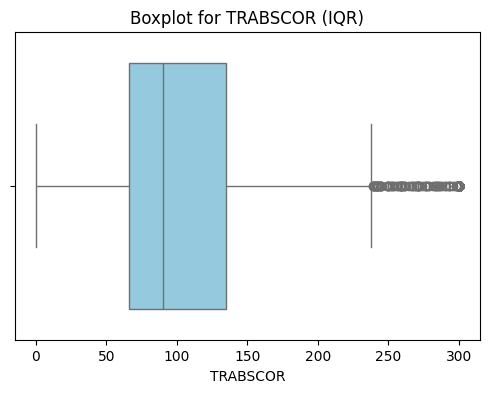

In [39]:
result = detector.detect_by_iqr(learning_set, columns=["TRABSCOR"], factor=1.5, verbose=False)

`TRABSCOR` shows many outliers between 250 and 300 seconds. This is normal, as it's a score that indicates very severe cognitive decline. However, there's one interesting finding, even if it doesn't appear as an outlier.

`TRABSCOR` shows 0 as minimum. For a time measurement, this is suspect and, in fact, most likely an error. 

In [40]:
print(learning_set['TRABSCOR'].value_counts().sort_index(ascending=False)) 

TRABSCOR
300.0    180
299.0      1
298.0      2
296.0      1
294.0      1
        ... 
29.0       1
28.0       1
21.0       1
6.0        2
0.0        1
Name: count, Length: 246, dtype: int64


The minimum time recorded for completing the Trail Making Test B is typically around 20 seconds. Lower values ​​are unrealistic, as the test always requires some time, even for highly skilled subjects.

**All values ​​under 21 will be replaced with 21 seconds.**

In [41]:
learning_set.loc[learning_set["TRABSCOR"] < 21, "TRABSCOR"] = 21

#### RAVLT
We now handle the `RAVLT_immediate`, `RAVLT_learning`, `RAVLT_forgetting` and `RAVLT_perc_forgetting` columns.

A list of 15 words ("List A") is read 5 times. After each reading, the subject freely recalls the words. Trials range from 1 to 5 (each from 0 to 15). Then an interference List B is presented and, after approximately 30 minutes, delayed recall of List A is requested (0–15). In many batteries, there is also a subsequent recognition test. 

| Variable                | Definition (ADNI)                         | Formula (from raw scores)     | Expected Range                                |
| ----------------------- | ----------------------------------------- | ----------------------------- | --------------------------------------------- |
| `RAVLT_immediate`       | Sum of 5 immediate trials                 | **T1 + T2 + T3 + T4 + T5**    | 0–75                                          |
| `RAVLT_learning`        | Learning gain                             | **T5 − T1**                   | approximately −15…+15 (usually ≥0)            |
| `RAVLT_forgetting`      | Forgetting from immediate peak to delayed | **T5 − Delayed**              | −15…+15                                       |
| `RAVLT_perc_forgetting` | Percentage forgetting                     | **(T5 − Delayed) / T5 × 100** | typically ≤100, may be **<0** if Delayed > T5 |

Let's start with `RAVLT_immediate`.

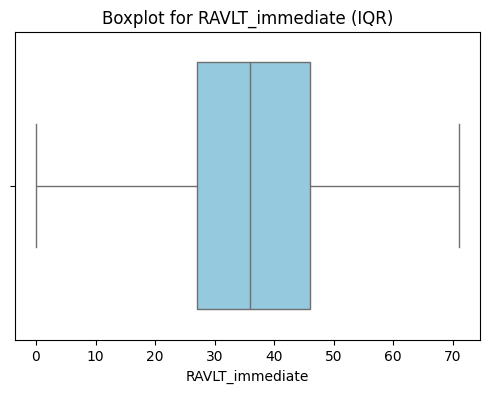

In [42]:
result = detector.detect_by_iqr(learning_set, columns=["RAVLT_immediate"], factor=1.5, verbose=False)

`RAVLT_immediate` appears to have no notable outliers. Let's move on to `RAVLT_learning`.

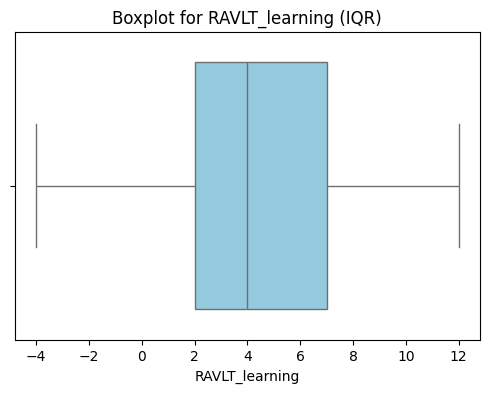

In [43]:
result = detector.detect_by_iqr(learning_set, columns=["RAVLT_learning"], factor=1.5, verbose=False)

`RAVLT_learning` appears to have no notable outliers. Let's move on to `RAVLT_perc_forgetting`. 

[ IQR Method ] Column: RAVLT_perc_forgetting
Lower bound: -83.3333, Upper bound: 210.0000
Detected 2 outliers.
  Index: 70, Value: -100.0
  Index: 2285, Value: -316.667


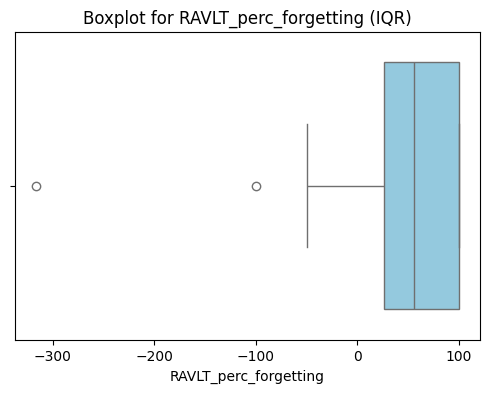

In [44]:
result = detector.detect_by_iqr(learning_set, columns=["RAVLT_perc_forgetting"], factor=1.5, verbose=True)

Here we see something **strange**. There are two Outliers:
- *-100%* is certainly an outlier, however it is plausible and therefore it will be left unchanged. 
- *-316.667%* is obviously an error. Let'see the corresponding `RAVLT_forgetting` value. 

In [45]:
print(learning_set.loc[learning_set["RAVLT_perc_forgetting"] == -316.667,["RAVLT_perc_forgetting", "RAVLT_forgetting"]])

      RAVLT_perc_forgetting  RAVLT_forgetting
2285               -316.667             -19.0


It is easy to see that the value *-316.667* is almost certainly an **error** so we have a problem. -19 for `RAVLT forgetting` is off the scale as the score ranges from -15 to 15. We don't have the *trials* or the *delayed* scores, so we can't correctly estimate the two values. The best thing to do is delete the row.

In [46]:
learning_set.drop(2285, inplace=True)
learning_set.reset_index(drop=True, inplace=True)

Now let's continue with `RAVLT_forgetting`. 

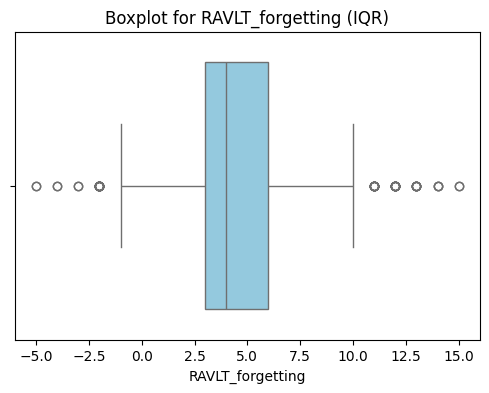

In [47]:
result = detector.detect_by_iqr(learning_set, columns=["RAVLT_forgetting"], factor=1.5, verbose=False)

`RAVLT_forgetting` appears to have some outliers, but none can be categorized as an error.

### ICV

`ICV` (Intracranial Volume) represents the total volume enclosed by the skull and varies according to factors such as gender, ethnicity, body height, and genetic background. We analyze the Outliers for this feature, dividing by males and females. 

ICV for MALES:
[ IQR Method ] Column: ICV
Lower bound: 1203452.5000, Upper bound: 1997732.5000
Detected 12 outliers.
  Index: 209, Value: 1998600.0
  Index: 299, Value: 2057400.0
  Index: 302, Value: 2040320.0
  Index: 660, Value: 2110290.0
  Index: 740, Value: 2072470.0
  Index: 970, Value: 2070410.0
  Index: 1152, Value: 2040440.0
  Index: 1545, Value: 1998250.0
  Index: 1905, Value: 1201110.0
  Index: 2043, Value: 3080200.0
  Index: 2082, Value: 2714340.0
  Index: 2306, Value: 3315210.0


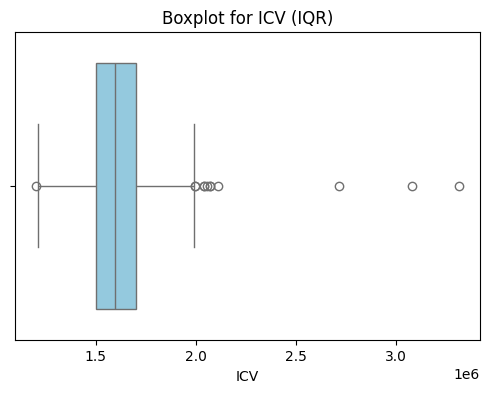

ICV for FEMALES:
[ IQR Method ] Column: ICV
Lower bound: 1075233.7500, Upper bound: 1745503.7500
Detected 11 outliers.
  Index: 50, Value: 1748210.0
  Index: 60, Value: 1784790.0
  Index: 291, Value: 1778480.0
  Index: 300, Value: 1848290.0
  Index: 529, Value: 1764630.0
  Index: 610, Value: 1754910.0
  Index: 1149, Value: 1795530.0
  Index: 1330, Value: 1765760.0
  Index: 1896, Value: 1071900.0
  Index: 1942, Value: 882242.0
  Index: 2215, Value: 1783420.0


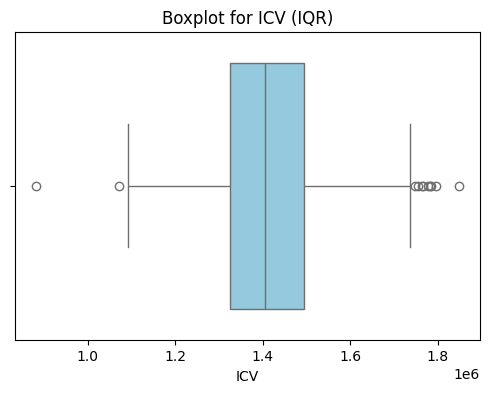

In [48]:
# Divide the dataset by gender
males = learning_set[learning_set["PTGENDER"] == 1]
females = learning_set[learning_set["PTGENDER"] == 0]

print("ICV for MALES:")
# # Apply the IQR method only to males
result_males = detector.detect_by_iqr(
    males,
    columns=["ICV"],
    factor=1.5,
    verbose=True
)

print("ICV for FEMALES:")
# Apply the IQR method only to females
result_females = detector.detect_by_iqr(
    females,
    columns=["ICV"],
    factor=1.5,
    verbose=True
)


Looking at the outliers, there are indeed some parameters that are implausible.
- Subject **1942** (female) has a completely implausible value (882,242 mm³), too low compared to adult female physiology (< 1.0M mm³ rare);
- Subject **2043** (male) has a skull too large (3,080,200 mm³) for any human;
- Subject **2082** (male) has a completely implausible value (2,714,340 mm³), too high compared to adult male physiology (> 2.0M mm³ rare);
- Subject **2306** (male) has the largest skull (3,315,210 mm³) and has a completely nonsensical value.

The best thing to do is not to impute them now (otherwise we would have **Data Leakage**), but to set them to NULL so that they will then be imputed during Preprocessing.

In [49]:
learning_set.loc[[1942, 2043, 2082, 2306], "ICV"] = np.nan

### Whole Brain

The brain is an organ that serves as the center of the nervous system and `WholeBrain` represents its dimension. We analyze the Outliers for this feature, dividing by males and females. 

Brain for MALES:
[ IQR Method ] Column: WholeBrain
Lower bound: 792577.5000, Upper bound: 1352437.5000
Detected 6 outliers.
  Index: 146, Value: 1364690.0
  Index: 231, Value: 1364230.0
  Index: 740, Value: 1443990.0
  Index: 1492, Value: 781164.0
  Index: 1545, Value: 1486040.0
  Index: 2298, Value: 1384530.0


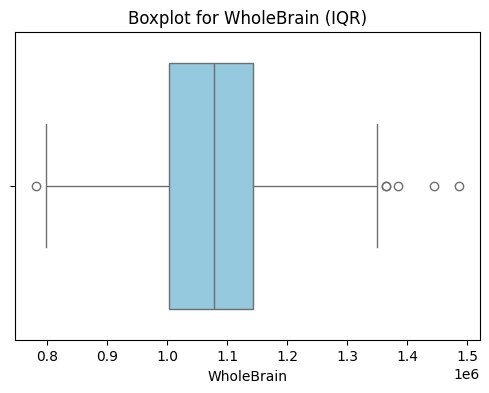

Brain for FEMALES:
[ IQR Method ] Column: WholeBrain
Lower bound: 721997.5000, Upper bound: 1227369.5000
Detected 8 outliers.
  Index: 300, Value: 1258690.0
  Index: 652, Value: 669364.0
  Index: 1500, Value: 1235950.0
  Index: 1603, Value: 1276420.0
  Index: 1942, Value: 521287.0
  Index: 2037, Value: 1228600.0
  Index: 2104, Value: 1245960.0
  Index: 2196, Value: 1243800.0


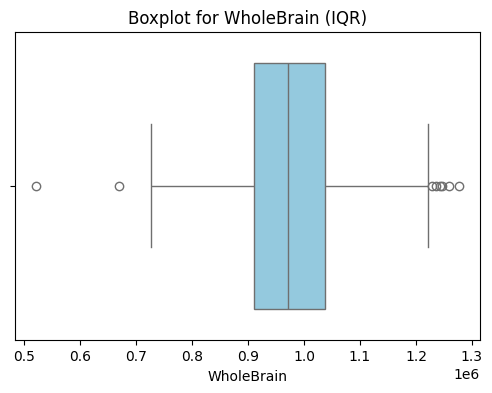

In [50]:
print("Brain for MALES:")
# # Apply the IQR method only to males
result_males = detector.detect_by_iqr(
    males,
    columns=["WholeBrain"],
    factor=1.5,
    verbose=True
)

print("Brain for FEMALES:")
# Apply the IQR method only to females
result_females = detector.detect_by_iqr(
    females,
    columns=["WholeBrain"],
    factor=1.5,
    verbose=True
)

Looking at the outliers, there are indeed some parameters that are implausible.
- Subject **652** (female) has too small a brain (669,364 mm³) in comparison with female brains;
- Subject **1492** (male) has a implausible value (781,164 mm³), too low compared to a male brain;
- Subject **1942** (female) has a completely implausible value (521,287 mm³) for a brain.
The best thing to do is not to impute them now (otherwise we would have **Data Leakage**), but to set them to NULL so that they will then be imputed during Preprocessing.

In [51]:
learning_set.loc[[652, 1492, 1942], "WholeBrain"] = np.nan

### Ventricles

The `Ventricles` are a set of four interconnected cavities in the brain that are filled with cerebrospinal fluid (CSF). We analyze the Outliers for this feature, dividing by males and females. 

Ventricles for MALES:
[ IQR Method ] Column: Ventricles
Lower bound: -16237.5000, Upper bound: 104280.5000
Detected 30 outliers.
  Index: 0, Value: 118233.0
  Index: 27, Value: 145115.0
  Index: 59, Value: 144303.0
  Index: 198, Value: 108261.0
  Index: 250, Value: 108119.0
  Index: 299, Value: 109900.0
  Index: 302, Value: 128593.0
  Index: 311, Value: 105019.0
  Index: 380, Value: 116677.0
  Index: 398, Value: 118875.0
  Index: 590, Value: 132663.0
  Index: 607, Value: 138037.0
  Index: 667, Value: 140133.0
  Index: 810, Value: 107503.0
  Index: 834, Value: 105540.0
  Index: 908, Value: 125840.0
  Index: 1079, Value: 122117.0
  Index: 1151, Value: 123032.0
  Index: 1243, Value: 106054.0
  Index: 1246, Value: 108404.0
  Index: 1359, Value: 131312.0
  Index: 1469, Value: 134953.0
  Index: 1501, Value: 105998.0
  Index: 1539, Value: 105677.0
  Index: 1805, Value: 116944.0
  Index: 1824, Value: 135171.0
  Index: 1919, Value: 113546.0
  Index: 2082, Value: 157713.0
  Index: 2203, Value: 1

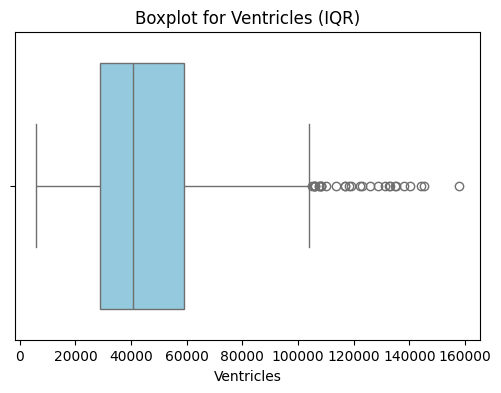

Ventricles for FEMALES:
[ IQR Method ] Column: Ventricles
Lower bound: -12278.1250, Upper bound: 70570.0750
Detected 36 outliers.
  Index: 50, Value: 71716.0
  Index: 96, Value: 77848.0
  Index: 113, Value: 98380.0
  Index: 190, Value: 77220.0
  Index: 288, Value: 74719.0
  Index: 381, Value: 101261.0
  Index: 417, Value: 84801.0
  Index: 520, Value: 78281.0
  Index: 707, Value: 104289.0
  Index: 812, Value: 73079.0
  Index: 836, Value: 87406.0
  Index: 911, Value: 76774.0
  Index: 973, Value: 101306.0
  Index: 987, Value: 72132.0
  Index: 1085, Value: 70867.0
  Index: 1098, Value: 84471.0
  Index: 1102, Value: 88181.0
  Index: 1264, Value: 75662.0
  Index: 1305, Value: 104172.0
  Index: 1313, Value: 81620.0
  Index: 1328, Value: 75829.0
  Index: 1333, Value: 79456.0
  Index: 1344, Value: 105953.0
  Index: 1488, Value: 102422.0
  Index: 1646, Value: 92447.0
  Index: 1746, Value: 71359.0
  Index: 1767, Value: 98283.5
  Index: 1790, Value: 81958.0
  Index: 1893, Value: 93785.9
  Index: 1

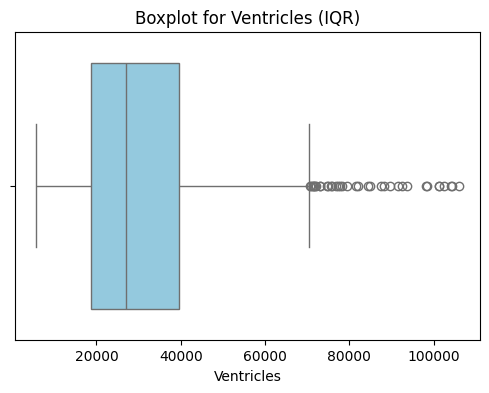

In [52]:
print("Ventricles for MALES:")
# # Apply the IQR method only to males
result_males = detector.detect_by_iqr(
    males,
    columns=["Ventricles"],
    factor=1.5,
    verbose=True
)

print("Ventricles for FEMALES:")
# Apply the IQR method only to females
result_females = detector.detect_by_iqr(
    females,
    columns=["Ventricles"],
    factor=1.5,
    verbose=True
)

Looking at the outliers, there is a parameter that are implausible. The subject **2082** has `Ventricles` of 157,713 mm³, the absolut maximum. This is beyond the limits observed even in extreme pathological cases. It is most likely a mistake. The best thing to do is not to impute them now (otherwise we would have **Data Leakage**), but to set them to NULL so that they will then be imputed during Preprocessing.

In [53]:
learning_set.loc[[2082], "Ventricles"] = np.nan

## Holdout Method

**Holdout Method** is the division of the dataset into two parts:
- **Training set**: used to train the model.
- **Test set**: used to evaluate performance on previously unseen data.

The target class is ***`DX`*** (which was ***`DX_bl`***), but we're not separating it yet because we want to make some dataset considerations based on ***`DX`*** as well. We'll remove it in due course.

*We decide to split the data into 80% for the training set and 20% for the testing set.*

In [54]:
# Split directly on the whole dataset
training_set, testing_set = train_test_split(
    learning_set,
    test_size=0.2,                  # 20% of the data goes to testing
    random_state=42,
    stratify=learning_set['DX']      # Maintains class proportions with stratify on the target column
)

learning_set.to_csv("../data/learning_set.csv", index=False)
training_set.to_csv("../data/pretrain.csv", index=False)
testing_set.to_csv("../data/pretest.csv", index=False)
display(training_set)

,DX,AGE,PTGENDER,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,mPACCdigit,mPACCtrailsB,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,ABETA,TAU,PTAU,FDG,PTDEMOGROUP,MARRIED
2244,AD,80.9,1,14,0.0,6.5,29.33,42.33,10.0,21.0,15.0,1.0,3.0,100.0000,0.0,300.0,19.0,-20.06920,-18.356400,62224.0,5490.1,1062370.0,1514.0,14851.0,17465.0,1560990.0,13.0,3.14286,3.00000,3.00000,3.2,2.50000,2.75,2.94595,4.000,3.44444,2.66667,3.00000,3.66667,3.75,3.47222,NaN,NaN,NaN,1.04262,6,0
199,LMCI,82.2,1,20,0.0,1.5,12.33,20.33,5.0,24.0,29.0,0.0,5.0,83.3333,2.0,155.0,4.0,-10.20060,-10.777900,85816.0,5848.0,1114900.0,2222.0,15428.0,18527.0,1740730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.08058,6,1
1251,LMCI,71.2,1,19,0.0,1.0,6.00,8.00,2.0,26.0,51.0,2.0,-2.0,-18.1818,2.0,106.0,2.0,-5.90200,-6.457590,38223.0,NaN,953823.0,NaN,NaN,NaN,1513740.0,25.0,2.75000,2.55556,2.28571,3.2,3.83333,3.50,2.92308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.41455,6,1
1366,CN,75.5,0,20,0.0,0.0,3.00,6.00,3.0,30.0,61.0,7.0,3.0,20.0000,19.0,58.0,0.0,3.19941,3.001880,61111.0,6691.0,923159.0,3760.0,17701.0,18124.0,1363380.0,26.0,1.75000,1.33333,1.00000,1.0,1.16667,1.00,1.25641,1.000,1.00000,1.00000,1.00000,1.00000,1.00,1.00000,762.0,200.6,18.84,1.11882,6,1
1975,CN,81.5,0,19,0.0,0.0,3.67,7.67,3.0,29.0,54.0,7.0,4.0,28.5714,11.0,54.0,0.0,-1.16303,-0.101632,44690.2,5771.1,892350.0,3576.0,16793.0,20855.0,1227990.0,29.0,1.87500,1.55556,1.00000,1.0,1.33333,1.75,1.44737,1.375,1.11111,1.00000,1.20000,1.16667,1.75,1.23684,NaN,NaN,NaN,NaN,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,LMCI,64.6,0,14,2.0,2.0,12.00,22.00,10.0,27.0,31.0,1.0,7.0,100.0000,0.0,62.0,9.0,-10.37820,-9.369810,28016.0,5561.0,970467.0,2723.0,15695.0,17056.0,1472550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,588.0,417.1,39.86,NaN,6,1
2015,LMCI,82.9,1,18,0.0,1.5,13.33,23.33,9.0,28.0,33.0,1.0,3.0,42.8571,5.0,79.0,1.0,-9.18102,-7.013430,48243.3,5074.9,1029360.0,2422.0,19827.0,22215.0,1586480.0,25.0,2.12500,1.12500,1.16667,2.0,2.50000,2.00,1.78378,2.625,1.62500,1.16667,1.40000,1.83333,2.00,1.81081,NaN,NaN,NaN,1.06861,6,1
15,LMCI,76.8,1,12,0.0,1.0,11.33,16.33,4.0,25.0,27.0,2.0,1.0,16.6667,3.0,300.0,1.0,-9.94141,-10.624000,29502.0,8154.0,977778.0,4381.0,14579.0,20174.0,1541090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,874.1,153.2,13.45,NaN,6,1
1094,LMCI,74.6,1,19,1.0,2.0,17.00,27.00,10.0,26.0,32.0,1.0,7.0,100.0000,3.0,102.0,8.0,-13.05080,-10.521600,78282.0,5522.0,1227000.0,2028.0,16802.0,17925.0,1910620.0,21.0,1.87500,1.33333,1.00000,1.2,1.33333,1.00,1.33333,3.125,2.87500,1.85714,1.33333,2.25000,3.25,2.55882,520.3,350.2,32.49,1.11678,6,1
